# Philanthropy Scores Analysis (Data: Forbes Billionaires, Source: Kaggle)
#### Data source:
[Forbes Billionaires](https://www.kaggle.com/datasets/princeiornongu/subset-data-to-billionaires-listed-in-forbes)
#### Data Cleaning Reference, Link below
[Data Cleaning](https://towardsdatascience.com/data-cleaning-with-python-using-pandas-library-c6f4a68ea8eb/)

The dataset contains information about 211 billionaires, including philanthropy scores, net worth, family, education and personal attributes.  Philanthropy scoring is as follows: 

1. Has given away less than 1% of wealth
2. Has given away 1% to 4.99% of wealt
3. Has given away 5% to 9.99% of wealth
4. Has given away 10% to 19.99% of wealth
5. Has given away 20% or more of wealth

In [24]:
# import required libraries:
import pandas as pd
import numpy as np
import seaborn as sns   
import csv as csv
import os

filename = '\\subset_data_wealth.csv'
filepath = os.getenv('SysDatasets')


# read the csv values into a dataframe 'df' 
df = pd.read_csv(filepath + filename)

# print the first 5 rows 
df.head(5)


,Rank,Name_Org,Forbes_ID,Net_Worth_($B),age,Age_Range_How_Old,Country_Working_In,Source_Of_WealthCompany,Industry,Age,...,Residence,Citizenship,Marital Status,Children,Education,Bachelor,Master,Doctorate,Drop Out,Self Made
0,1,Bernard Arnault & family,bernard-arnault,211,74,8,France,LVMH,Fashion & Retail,74,...,"Paris, France",France,Married,5,"Bachelor of Arts/Science, Ecole Polytechnique ...",1,0,0,0,0
1,2,Elon Musk,elon-musk,180,51,6,United States,"Tesla, SpaceX",Automotive,52,...,"Austin, Texas",United States,Single,10,"Bachelor of Arts/Science, University of Pennsy...",1,0,0,0,1
2,3,Jeff Bezos,jeff-bezos,114,59,6,United States,Amazon,Technology,59,...,"Medina, Washington",United States,Engaged,4,"Bachelor of Arts/Science, Princeton University",1,0,0,0,1
3,4,Larry Ellison,larry-ellison,107,78,8,United States,Oracle,Technology,79,...,"Lanai, Hawaii",United States,In Relationship,4,"Drop Out, University of Chicago; Drop Out, Uni...",0,0,0,1,1
4,5,Warren Buffett,warren-buffett,106,92,10,United States,Berkshire Hathaway,Finance & Investments,92,...,"Omaha, Nebraska",United States,"Widowed, Remarried",3,"Master of Science, Columbia University; Bachel...",1,1,0,0,1


In [25]:
#check the datatypes, confirmed numeric datatypes are int
df.dtypes

Rank                        int64
Name_Org                   object
Forbes_ID                  object
Net_Worth_($B)              int64
age                         int64
Age_Range_How_Old           int64
Country_Working_In         object
Source_Of_WealthCompany    object
Industry                   object
Age                         int64
Source of Wealth           object
Self-Made Score             int64
Philanthropy Score          int64
Residence                  object
Citizenship                object
Marital Status             object
Children                    int64
Education                  object
Bachelor                    int64
Master                      int64
Doctorate                   int64
Drop Out                    int64
Self Made                   int64
dtype: object

Steps to prepare the data for analysis include renaming columns, adding 2 booleans, and filtering for quantifiables.

In [26]:
# Dropping the column Forbes_ID from df
df = df.drop(['Forbes_ID'], axis=1)

# Renaming the column names to make them more user-friendly 
df = df.rename(columns={
                        "Name_Org": "Name or Organization", 
                     "Net_Worth_($B)": "Net Worth (B)",
                       "Source_Of_WealthCompany": "Source of Wealth Company",
                       "Age_Range_How_Old": "Age Range", 
                          "Country_Working_In": "Working Country"
                        }
              )

In [27]:
#develop an attribute that simplifies 'Children', i.e. are they a parent vs. # of children 
df['Parent'] = np.where(df['Children'] >=1, 1, 0)

#to test industry hypothesis, create a technology industry attribute (a greater count of higher scoring is in technology)
df['Technology'] = np.where(df['Industry'] == "Technology", 1, 0)



In [28]:
# create a subset of quantifiable attributes for a heat map
heat_cols = ['Philanthropy Score', 'Parent', 'Bachelor','Master', 'Doctorate', 'Drop Out', 'Self Made', 'Net Worth (B)', 'Age Range', 'Technology']
df_heat = df[heat_cols]

A predictor cannot be identified from these attributes.  

<Axes: >

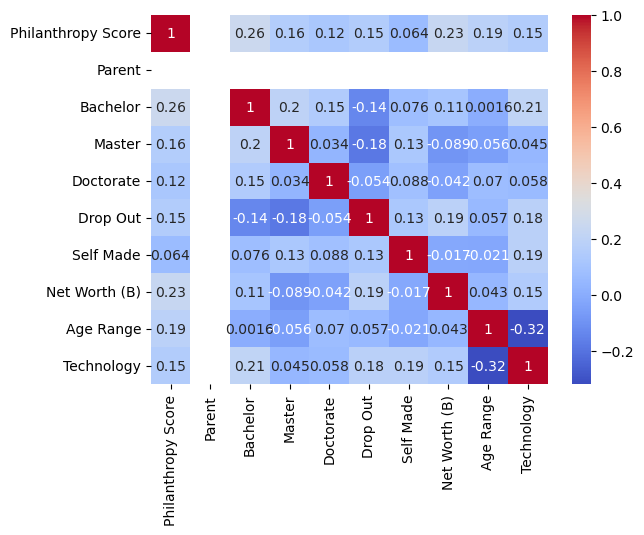

In [29]:
sns.heatmap(df_heat.corr(), annot=True, cmap='coolwarm')

Next, examine the overall number of samples by philanthropy score.  Most have a lower score of 1.  Very few are higher scoring.    

<Axes: xlabel='Philanthropy Score', ylabel='Count'>

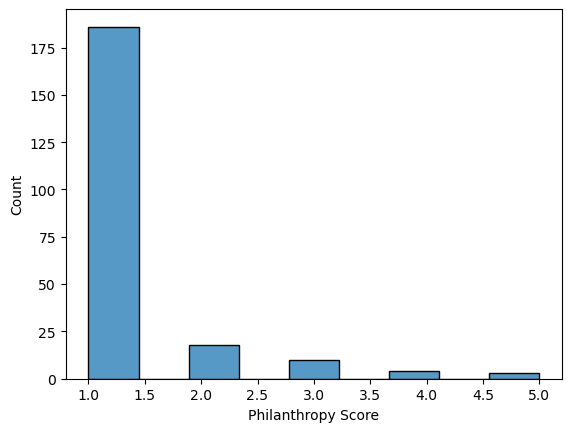

In [30]:
sns.histplot(df, x="Philanthropy Score")

Next, examine countries of citizenship by philanthropy score.  

<Axes: xlabel='Philanthropy Score', ylabel='Citizenship'>

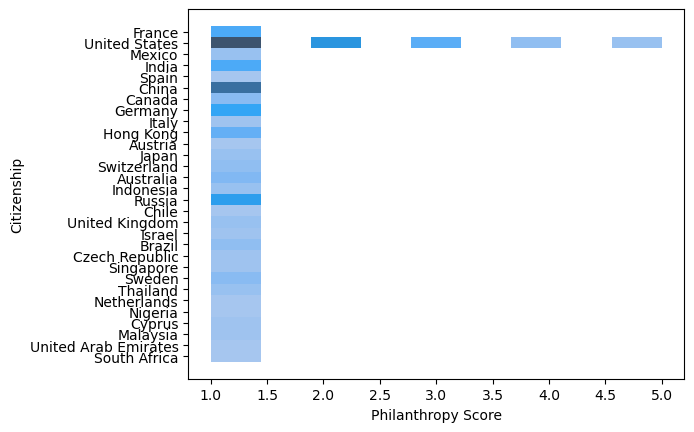

In [31]:
sns.histplot(df, x="Philanthropy Score",y="Citizenship")

Here is a closer look at individuals having a philanthropy score of at least 2 (35 Billionaires).  

In [32]:
# create a frame that filters the main df for a score of at least 2
filtered_df = df[df['Philanthropy Score'] > 1]

<Axes: xlabel='Count', ylabel='Industry'>

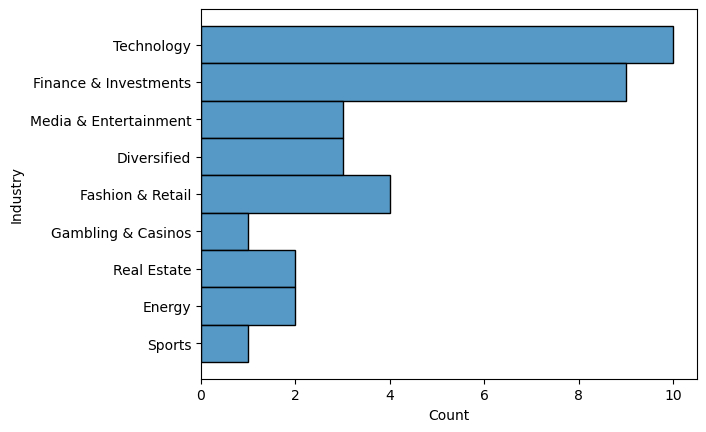

In [33]:
sns.histplot(filtered_df, y = "Industry")

Technology and Finance have the highest number where the score is at least 2.    

A closer look at countries of citizenship where the score is at least 2.  

<Axes: xlabel='Count', ylabel='Citizenship'>

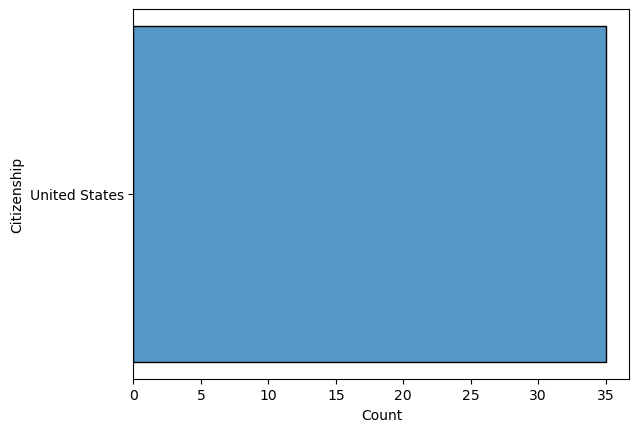

In [34]:
sns.histplot(filtered_df, y = "Citizenship")